In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

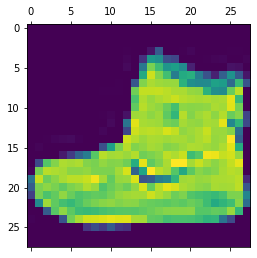

In [6]:
plt.matshow(x_train[0])

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
class_names[y_train[0]]

'Ankle boot'

49358
Bag


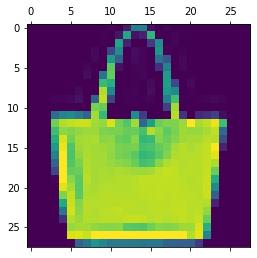

In [12]:
import random
i = random.randint(0, len(x_train))
print(i)
plt.matshow(x_train[i])
print(class_names[y_train[i]])

In [13]:
## Scaling the data before model training

scaled_x_train = x_train/255
scaled_x_test = x_test/255

In [16]:
y_test[0]

9

In [15]:
categ_y_train = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
categ_y_test = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [18]:
categ_y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(scaled_x_train, categ_y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 20s 9ms/step - loss: 0.4708 - accuracy: 0.8310
Epoch 2/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3588 - accuracy: 0.8678
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3207 - accuracy: 0.8820
Epoch 4/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2966 - accuracy: 0.8889
Epoch 5/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2810 - accuracy: 0.8954
Epoch 6/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2658 - accuracy: 0.9001
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2516 - accuracy: 0.9055
Epoch 8/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2379 - accuracy: 0.9099
Epoch 9/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2300 - accuracy: 0.9133
Epoch 10/15
1875/1875 [==============================] - 18s 9ms/step

In [20]:
model.evaluate(scaled_x_test, categ_y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3470 - accuracy: 0.8900


[0.3469931185245514, 0.8899999856948853]

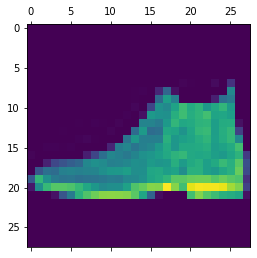

In [21]:
plt.matshow(x_test[0])

In [23]:
print(class_names[np.argmax(model.predict(scaled_x_test)[0])])


313/313 [==============================] - 2s 7ms/step
Ankle boot


In [24]:
class_names[y_test[0]]

'Ankle boot'

45
313/313 [==============================] - 3s 8ms/step
Predicted class:  Sneaker
Actual Class:  Sneaker


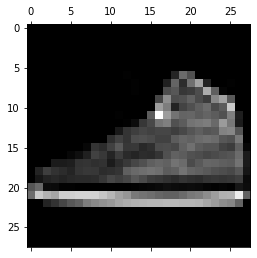

In [28]:
i = random.randint(0, len(x_test))

print(i)
plt.matshow(x_test[i], cmap='gray')
print("Predicted class: ",class_names[np.argmax(model.predict(scaled_x_test)[i])])
print("Actual Class: ", class_names[y_test[i]])